<ipython-input-56-635f14f71edf>:42: LinAlgWarning: Ill-conditioned matrix (rcond=6.51691e-17): result may not be accurate.
  x_sol = solve(A, b)
<ipython-input-56-635f14f71edf>:42: LinAlgWarning: Ill-conditioned matrix (rcond=3.03558e-17): result may not be accurate.
  x_sol = solve(A, b)


Диапазон порядка матрицы (1 типа) с 1 по 531


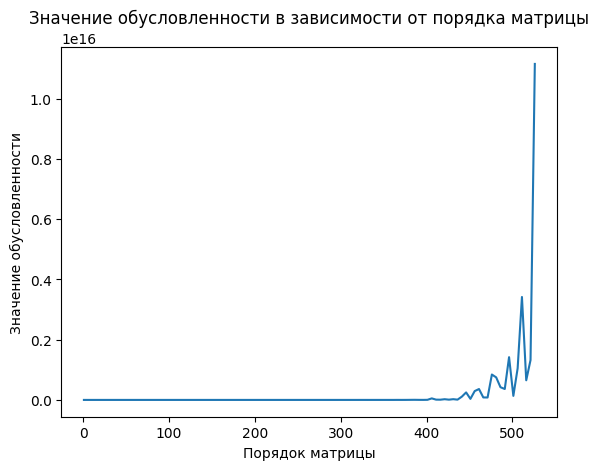

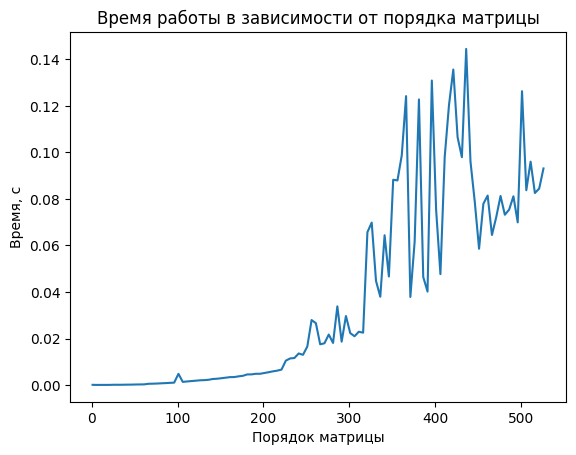

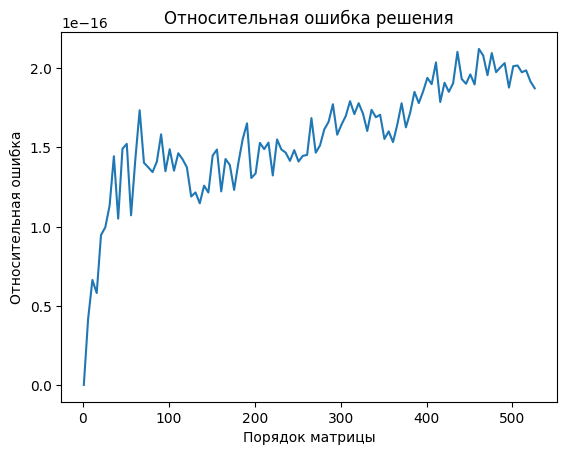

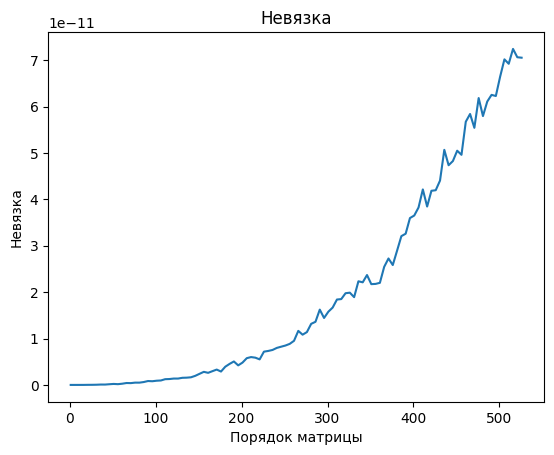

<ipython-input-56-635f14f71edf>:84: LinAlgWarning: Ill-conditioned matrix (rcond=4.15634e-17): result may not be accurate.
  x_sol = solve(A, b)
<ipython-input-56-635f14f71edf>:84: LinAlgWarning: Ill-conditioned matrix (rcond=4.46728e-17): result may not be accurate.
  x_sol = solve(A, b)
<ipython-input-56-635f14f71edf>:84: LinAlgWarning: Ill-conditioned matrix (rcond=4.08918e-17): result may not be accurate.
  x_sol = solve(A, b)


Диапазон порядка матрицы (2 типа) с 1 по 506


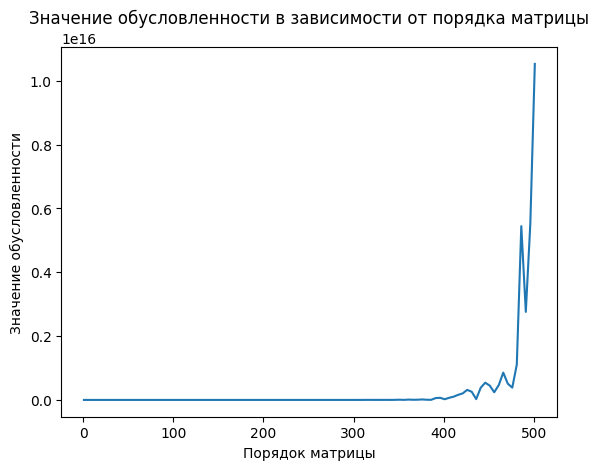

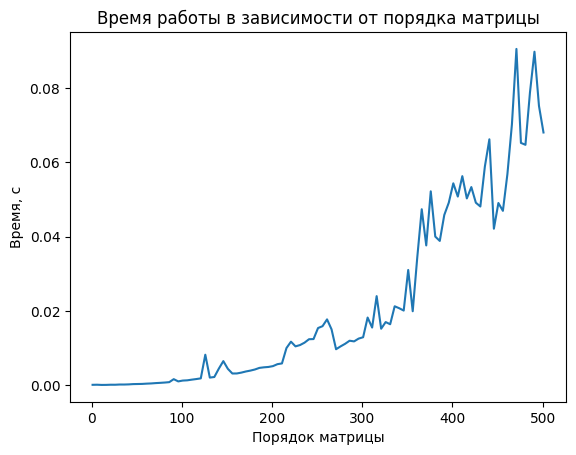

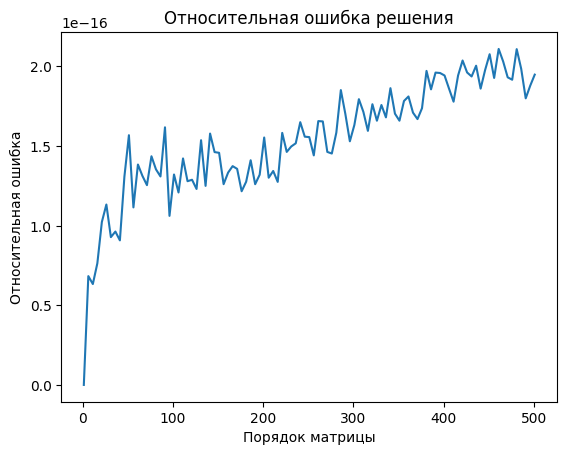

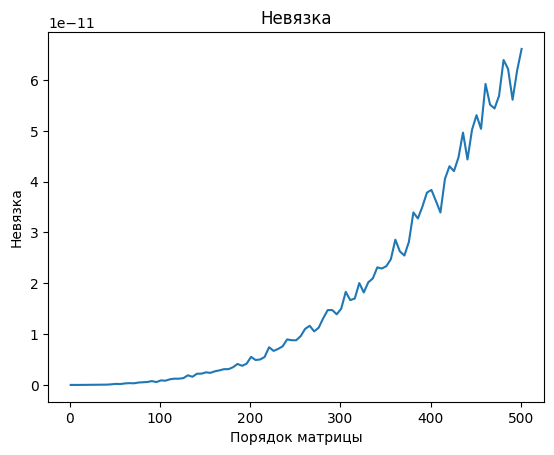

In [56]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve

# функция для создания матрицы вида LU
def generate_lu_matrix(n):
    L = np.tril(np.random.rand(n, n) + np.diag(np.ones(n)))
    U = np.triu(np.random.rand(n, n) + np.diag(np.ones(n)))
    return np.dot(L, U)

# функция для создания матрицы вида LL^T
def generate_llt_matrix(n):
    L = np.tril(np.random.rand(n, n) + np.diag(np.ones(n)))
    return np.dot(L, L.T)

# функция для вычисления обусловленности и времени работы
def compute_cond_time(A):
    start_time = time.time()
    cond = np.linalg.cond(A)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return cond, elapsed_time
# Вычисление относительной ошибки решения
def relative_error(A, b, x):
    residual_norm = np.linalg.norm(A @ x - b)
    solution_norm = np.linalg.norm(x)
    matrix_norm = np.linalg.norm(A)
    return residual_norm / (matrix_norm * solution_norm)
# Вычисление невязки
def residual(A, b, x):
    return np.linalg.norm(A @ x - b)
# первый класс матриц
cond1 = 0
#массивы для хранения обусловленности, времени, порядка матрицы, относительной ошибки решения, невязки
conds1, times1, ns1, relative_errors1,resuduals1 = [], [], [], [],[] 
n1 = 1
while cond1 < 10 ** 16:
    #создание матрицы
    A = generate_lu_matrix(n1)
    #cоздание случайного вектора X
    x = np.random.rand(n1)
    #находождение вектора B
    b = A @ x
    #решение системы  Ax=b , используя команду solve.
    x_sol = solve(A, b)
    #нахождение обусловленности матрицы, и времени которое на эту функцию тратится
    cond1, elapsed_time = compute_cond_time(A)
    conds1.append(cond1)
    times1.append(elapsed_time)
    #Вычисление относительной ошибки решения
    relative_errors1.append(relative_error(A, b, x_sol))
    #Вычисление невязки
    resuduals1.append(residual(A, b, x_sol))
    ns1.append(n1)
    n1 += 5

print("Диапазон порядка матрицы (1 типа) с 1 по", n1)
#построение графиков
plt.plot(ns1, conds1)
plt.title("Значение обусловленности в зависимости от порядка матрицы")
plt.xlabel("Порядок матрицы")
plt.ylabel("Значение обусловленности")
plt.show()
print()
plt.plot(ns1, times1)
plt.title("Время работы в зависимости от порядка матрицы")
plt.xlabel("Порядок матрицы")
plt.ylabel("Время, с")
plt.show()
print()
plt.plot(ns1,  relative_errors1)
plt.title("Относительная ошибка решения")
plt.xlabel("Порядок матрицы")
plt.ylabel("Относительная ошибка")
plt.show()
print()
plt.plot(ns1, resuduals1)
plt.title("Невязка")
plt.xlabel("Порядок матрицы")
plt.ylabel("Невязка")
plt.show()
print()
# второй класс матриц

cond2 = 0
conds2, times2, ns2,relative_errors2,resuduals2 = [], [], [], [], []
n2 = 1
while cond2 < 10 ** 16:
    A = generate_llt_matrix(n2)
    x = np.random.rand(n2)
    b = A @ x
    x_sol = solve(A, b)
    cond2, elapsed_time = compute_cond_time(A)
    conds2.append(cond2)
    times2.append(elapsed_time)
    relative_errors2.append(relative_error(A, b, x_sol))
    resuduals2.append(residual(A, b, x_sol))
    ns2.append(n2)
    n2 += 5

print("Диапазон порядка матрицы (2 типа) с 1 по", n2)
plt.plot(ns2, conds2)
plt.title("Значение обусловленности в зависимости от порядка матрицы")
plt.xlabel("Порядок матрицы")
plt.ylabel("Значение обусловленности")
plt.show()
print()
plt.plot(ns2, times2)
plt.title("Время работы в зависимости от порядка матрицы")
plt.xlabel("Порядок матрицы")
plt.ylabel("Время, с")
plt.show()
print()
plt.plot(ns2,  relative_errors2)
plt.title("Относительная ошибка решения")
plt.xlabel("Порядок матрицы")
plt.ylabel("Относительная ошибка")
plt.show()
print()
plt.plot(ns2, resuduals2)
plt.title("Невязка")
plt.xlabel("Порядок матрицы")
plt.ylabel("Невязка")
plt.show()